In [1]:
pip install coppeliasim-zmqremoteapi-client

Note: you may need to restart the kernel to use updated packages.


#### Importando as funções

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import *
import time

#### Remote API functions (Python)
Criação do cliente para conexão com a api remota

Link para repositório da SimZMQRemoteApi: https://github.com/CoppeliaRobotics/zmqRemoteApi/tree/master/clients/python

In [3]:
# create a client to connect to zmqRemoteApi server:
# (creation arguments can specify different host/port,
# defaults are host='localhost', port=23000)
client = RemoteAPIClient()

# get a remote object:
sim = client.require('sim')

# call API function fo test:
h = sim.getObject('/Floor')
print("Printando o chão: " + str(h))


Printando o chão: 13


### Transformações Homogêneas

Coordenadas homogêneas
Transformações rígidas -> Transformações lineares

Exp: Seja {B} um referencial rotacional theta = 30º em torno de ^Za e transladado 10 unidades em ^Xa e 5 unidades em ^Ya. Dado o ponto bP, defina abT e aP. "Temos o referencial {B} que tem uma certa rotação e um certo deslocamento em relação ao referencial A. Temos o ponto bP (3,7,0) descrito em relação a B.  Queremos a definição deste ponto em relação ao sistema de coordenadas A"

Resolução:
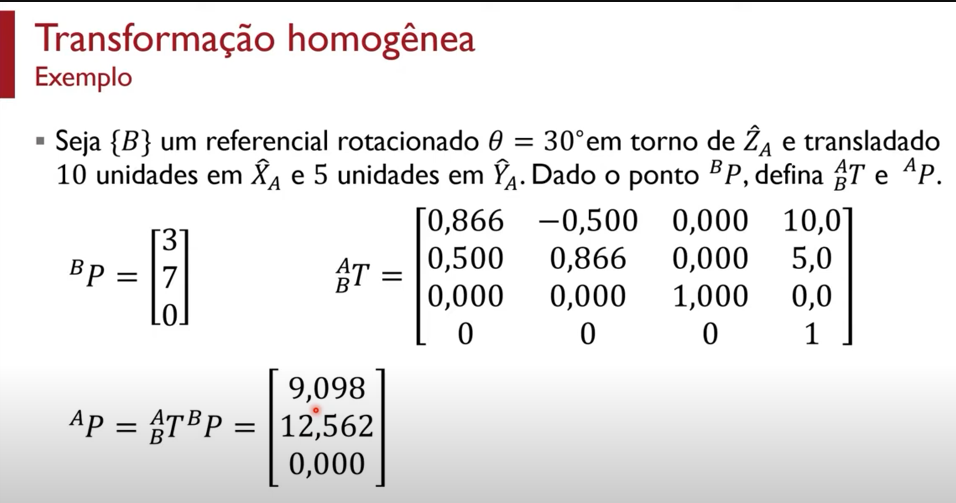

onde em bP, adicionamos um 1 em sua quarta posição no vetor para que seja possível multiplicar por abT.
bP = [3,7,0,1]

a na verdade é = aP = abT*bP = (9.098, 12.562, 0.000, 1) 

In [4]:
# Função para rotacionar em torno do eixo z
def Rz(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Função para plotar um referencial
def plot_frame(Porg, R, c=['r', 'g']):
    axes = R[:, :2] * 0.5  # Reduz a escala dos eixos para melhor visualização
    plt.quiver(*Porg[:2], *axes[0], color=c[0], angles='xy', scale_units='xy', scale=1, label='X')
    plt.quiver(*Porg[:2], *axes[1], color=c[1], angles='xy', scale_units='xy', scale=1, label='Y')
    plt.plot(Porg[0], Porg[1], 'ko')  # Origem

Posição do PioneerP3DX: [6.057123985304052, 1.4825561509539398, 0.13865436713138737, 1]
Posição da árvore em relação ao PioneerP3DX: [-2.51499907 -3.44389382  0.          1.        ]
Posição da planta em relação ao PioneerP3DX: [-1.5887494  -1.14820507  0.16500011  1.        ]
Posição da escada em relação ao PioneerP3DX: [0.6613156  1.65456777 1.23851204 1.        ]
Posição do vaso em relação ao PioneerP3DX: [1.53737113 2.93719509 0.42429245 1.        ]
Posição do rack em relação ao PioneerP3DX: [5.98855626 1.92751634 0.85500002 1.        ]


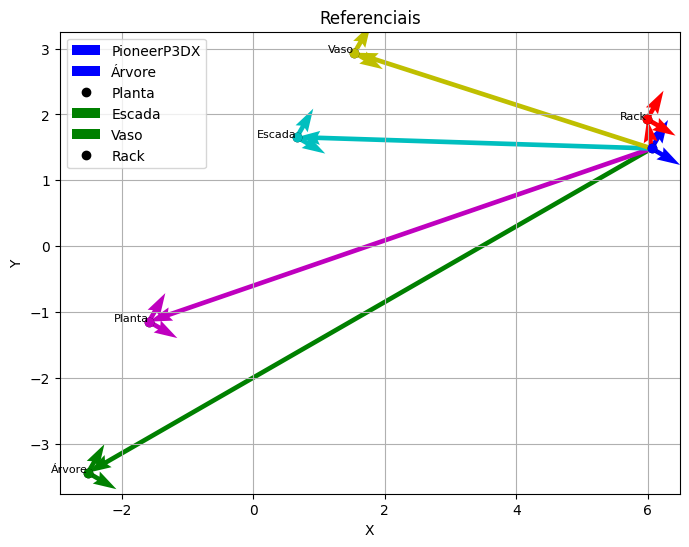

In [8]:
# Função para recuperar as posições dos objetos no cenário do CoppeliaSim
def get_object_position(sim, object_name):
    return sim.getObjectPosition(sim.getObject(object_name), -1)

# Posições dos objetos aleatórias
# robot_position = [-6.819471710920334, -1.8749987012616887, 0.13879306614398956]
# tree_position = [-3.8999999999999995, -1.7250000000000005, 0.0]
# plant_position = [-1.9499998807907086, -0.2000000596046449, 0.16500011086463928]
# stairs_position = [0.8749999949413185, 1.2522399231791483, 1.2385120391845703]
# vase_position = [2.8000000000000003, 1.7750000000000001, 0.4242924451828003]
# rack_position = [6.150000022053695, -1.3250000154972923, 0.8550000190734863]

wcf_position = get_object_position(sim, '/ReferenceFrameWorld')
robot_position = get_object_position(sim, '/PioneerP3DX')
tree_position = get_object_position(sim, '/tree')
plant_position = get_object_position(sim, '/indoorPlant')
stairs_position = get_object_position(sim, '/stairs')
vase_position = get_object_position(sim, '/toilet')
rack_position = get_object_position(sim, '/rack')

robot_position = robot_position + [1] # Adicionando mais uma dimensão para a coordenada ser homogênea
print("Posição do PioneerP3DX: " + str(robot_position))
theta = np.deg2rad(30)
Rab = Rz(theta)

# Concatena o vetor origem ao final (coluna)
Tab1 = np.hstack((Rab, np.zeros((3, 1))))
Tab2 = np.hstack((Rab, np.zeros((3, 1))))
Tab3 = np.hstack((Rab, np.zeros((3, 1))))
Tab4 = np.hstack((Rab, np.zeros((3, 1))))
Tab5 = np.hstack((Rab, np.zeros((3, 1))))

# Adiciona a linha [0, 0, 0, 1] ao final
Tab1 = np.vstack((Tab1, np.array([0, 0, 0, 1])))
Tab2 = np.vstack((Tab2, np.array([0, 0, 0, 1])))
Tab3 = np.vstack((Tab3, np.array([0, 0, 0, 1])))
Tab4 = np.vstack((Tab4, np.array([0, 0, 0, 1])))
Tab5 = np.vstack((Tab5, np.array([0, 0, 0, 1])))

# Transformação dos objetos
tree_to_robot = Tab1 @ np.array(tree_position + [1])
plant_to_robot = Tab2 @ np.array(plant_position + [1])
stairs_to_robot = Tab3 @ np.array(stairs_position + [1])
vase_to_robot = Tab4 @ np.array(vase_position + [1])
rack_to_robot = Tab5 @ np.array(rack_position + [1])

print("Posição da árvore em relação ao PioneerP3DX: " + str(tree_to_robot))
print("Posição da planta em relação ao PioneerP3DX: " + str(plant_to_robot))
print("Posição da escada em relação ao PioneerP3DX: " + str(stairs_to_robot))
print("Posição do vaso em relação ao PioneerP3DX: " + str(vase_to_robot))
print("Posição do rack em relação ao PioneerP3DX: " + str(rack_to_robot))

# Plotando os referencias
plt.figure(figsize=(8, 6))
plot_frame(robot_position[:2], Rab, ['b', 'b'])
plot_frame(tree_to_robot[:2], Rab, ['g', 'g'])
plot_frame(plant_to_robot[:2], Rab, ['m', 'm'])
plot_frame(stairs_to_robot[:2], Rab, ['c', 'c'])
plot_frame(vase_to_robot[:2], Rab, ['y', 'y'])
plot_frame(rack_to_robot[:2], Rab, ['r', 'r'])

# Vetor de posição do objeto em relação ao PioneerP3DX
plt.quiver(*robot_position[:2], *(tree_to_robot[:2] - robot_position[:2]), color='g', angles='xy', scale_units='xy', scale=1)
plt.quiver(*robot_position[:2], *(plant_to_robot[:2] - robot_position[:2]), color='m', angles='xy', scale_units='xy', scale=1)
plt.quiver(*robot_position[:2], *(stairs_to_robot[:2] - robot_position[:2]), color='c', angles='xy', scale_units='xy', scale=1)
plt.quiver(*robot_position[:2], *(vase_to_robot[:2] - robot_position[:2]), color='y', angles='xy', scale_units='xy', scale=1)
plt.quiver(*robot_position[:2], *(rack_to_robot[:2] - robot_position[:2]), color='r', angles='xy', scale_units='xy', scale=1)


# Plotagem dos pontos
plt.plot(robot_position[0], robot_position[1], 'bo')
plt.plot(tree_to_robot[0], tree_to_robot[1], 'go')
plt.plot(plant_to_robot[0], plant_to_robot[1], 'mo')
plt.plot(stairs_to_robot[0], stairs_to_robot[1], 'co')
plt.plot(vase_to_robot[0], vase_to_robot[1], 'yo')
plt.plot(rack_to_robot[0], rack_to_robot[1], 'ro')

plt.legend(['PioneerP3DX', 'Árvore', 'Planta', 'Escada', 'Vaso', 'Rack'])

# Adiciona legendas para os pontos
plt.text(tree_to_robot[0], tree_to_robot[1], 'Árvore', fontsize=8, ha='right')
plt.text(plant_to_robot[0], plant_to_robot[1], 'Planta', fontsize=8, ha='right')
plt.text(stairs_to_robot[0], stairs_to_robot[1], 'Escada', fontsize=8, ha='right')
plt.text(vase_to_robot[0], vase_to_robot[1], 'Vaso', fontsize=8, ha='right')
plt.text(rack_to_robot[0], rack_to_robot[1], 'Rack', fontsize=8, ha='right')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Referenciais')
plt.grid(True)
plt.axis('equal')
plt.show()

### Leitura do Laser Hokuyo

In [168]:
# Run a simulation in asynchronous mode:
clientID = sim.startSimulation()

def readSensorData( range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):
    # Get the Hokuyo range data signal
    range_data_signal = sim.getStringSignal(range_data_signal_id)   
    # Get the Hokuyo angle data signal
    angle_data_signal = sim.getStringSignal(angle_data_signal_id)

    time.sleep(10)

    print("Range data signal: ", range_data_signal)
    print("Angle data signal: ", angle_data_signal)
    # check the if both data were obtained correctly
    if range_data_signal is None or angle_data_signal is None:
        return None, None
    
    # Get the range data from the signal
    range_data = range_data_signal["data"]
    # Get the angle data from the signal
    angle_data = angle_data_signal["data"]

    print("Range data: ", range_data)
    print("Angle data: ", angle_data)

    return range_data, angle_data

def draw_laser_data(laser_data, max_sensor_range):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)
    
    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

# Stop the simulation:
sim.stopSimulation()

In [84]:
# Run a simulation in asynchronous mode:
clientID = sim.startSimulation()

if clientID != -1:
    print("Connected to remote API server")

    # Handle para o ROBÔ    
    robot = sim.getObject('/PioneerP3DX')
    
    # Handle para as juntas das RODAS
    motorLeft=sim.getObject("./leftMotor")
    motorRight=sim.getObject("./rightMotor")
    # returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    # returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait) 


    if robot != -1:
        print("Robot handle obtained")
    else:
        print("Failed to obtain robot handle")
        print("Exiting...")
        exit()

else:
    print("Failed to connect to remote API server")
    print("Exiting...")

print("Program ended")
        

Connected to remote API server
Robot handle obtained
Program ended
